# Exploring the NWM Reanalysis dataset

## Download a timeseries of netcdf files from s3, then plot the streamflow at one ComID 

In [1]:
from reanalysis import *
import pandas as pd
import os
import xarray as xr
from glob import glob
from time import time

%matplotlib inline

### Download 2 years worth of data in 12 hour intervals

In [2]:
start_date = '2003-09-10'
end_date = '2005-09-10'
freq = "12H"

In [4]:
s3paths = get_reanalysis_paths(start_date, end_date, freq)

In [5]:
len(s3paths)

1463

In [11]:
st = time()

s3download_parallel(s3paths, 'data')
    
print(round((time()-st), 2), 'seconds to download')

490.11 seconds to download


## Begin exploration

In [13]:
start = time()

In [14]:
comid = 22340547
files = glob('data/*')
assert len(files) == len(s3paths), 'Downloading error'

In [15]:
all_data = xr.open_mfdataset(files)
all_data

<xarray.Dataset>
Dimensions:         (feature_id: 2729077, reference_time: 9, time: 1463)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 2003-07-01 ... 2005-07-01
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
  * time            (time) datetime64[ns] 2003-09-10 ... 2005-09-10
Data variables:
    streamflow      (time, feature_id) float64 dask.array<shape=(1463, 2729077), chunksize=(1, 2729077)>
    q_lateral       (time, feature_id) float64 dask.array<shape=(1463, 2729077), chunksize=(1, 2729077)>
    velocity        (time, feature_id) float64 dask.array<shape=(1463, 2729077), chunksize=(1, 2729077)>
    qSfcLatRunoff   (time, feature_id) float64 dask.array<shape=(1463, 2729077), chunksize=(1, 2729077)>
    qBucket         (time, feature_id) float64 dask.array<shape=(1463, 2729077), chunksize=(1, 2729077)>
    qBtmVertRunoff  (time, feature_id) float64 dask.array<shape=(1463, 2729077), chunksize=(1, 2729077)>
Attributes:
    featureType:

In [16]:
df = all_data.sel(feature_id=comid)['streamflow'].to_dataframe().drop(columns=['feature_id'])

In [17]:
df.head()

,streamflow
time,
2003-09-10 00:00:00,824.949982
2003-09-10 12:00:00,722.259984
2003-09-11 00:00:00,633.909986
2003-09-11 12:00:00,554.939988
2003-09-12 00:00:00,488.949989


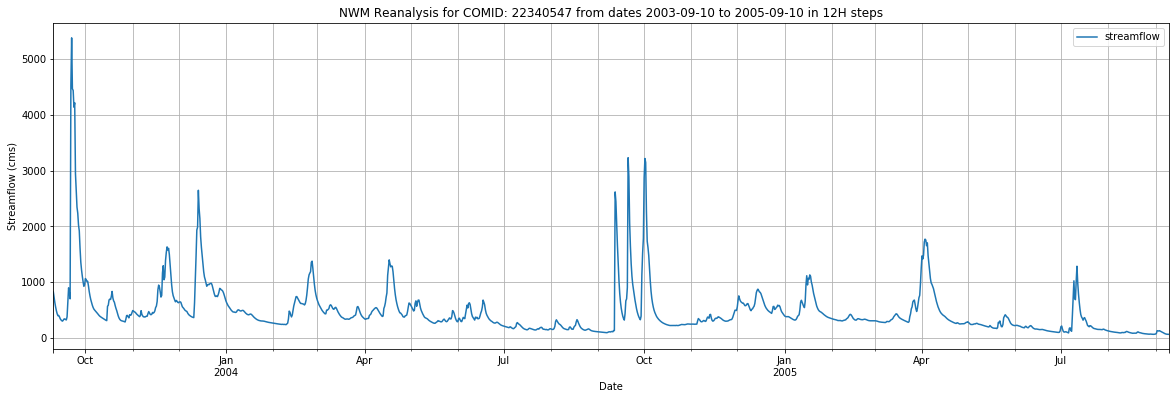

In [18]:
plotReanalysis(df, comid, freq)

In [19]:
print(round((time()-start), 2), 'seconds to access', sum([os.path.getsize(f) for f in files])/1e9, 'GB of data and produce a time series plot')

556.9 seconds to access 26.747670393 GB of data and produce a time series plot
